In [1]:
from inversion_edits import ddim_inversion_latent, ddim_first_skipped_latent

from diffusers import DDIMScheduler, StableDiffusionPipeline
import torch

model_id = "runwayml/stable-diffusion-v1-5"
#model_id = "./cat_finetuned"
pipe = StableDiffusionPipeline.from_pretrained(model_id, torch_dtype=torch.float16).to(
    "cuda:0"
)


/home/simo/anaconda3/envs/torch/lib/python3.10/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
Fetching 15 files:   0%|          | 0/15 [00:00<?, ?it/s]































































































































































































































Fetching 15 files:  20%|██        | 3/15 [02:23<09:34, 47.84s/it]




















































Scheduler for Pipe is now DDIMScheduler


51it [00:01, 28.83it/s]


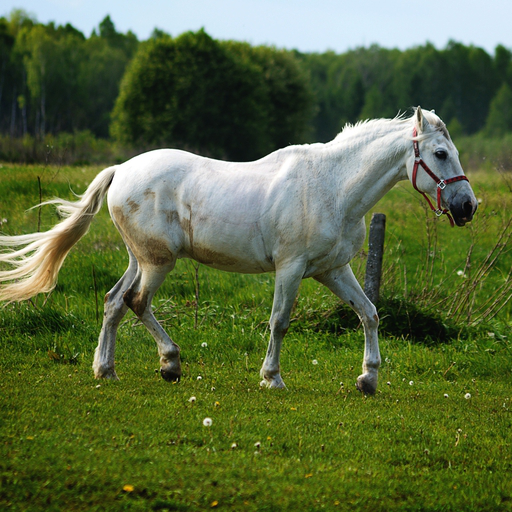

In [ ]:
import PIL
x = PIL.Image.open("horse.jpg")
lat = ddim_first_skipped_latent(pipe, x, condition_prompt="", num_inference_steps= 50, skip_ratio=0.5)
x

100%|██████████| 50/50 [00:02<00:00, 17.03it/s]


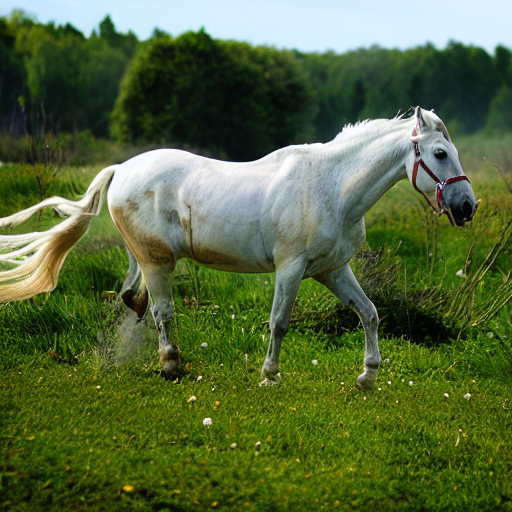

In [ ]:
pipe.safety_checker = None
x_reco = pipe(prompt = "", latents = lat)
x_reco.images[0]

In [ ]:
pipe.safety_checker = None
x2 = pipe(prompt = "horse with blue boots", latents = lat, num_inference_steps=100, guidance_scale= 7.)

100%|██████████| 100/100 [00:07<00:00, 14.25it/s]


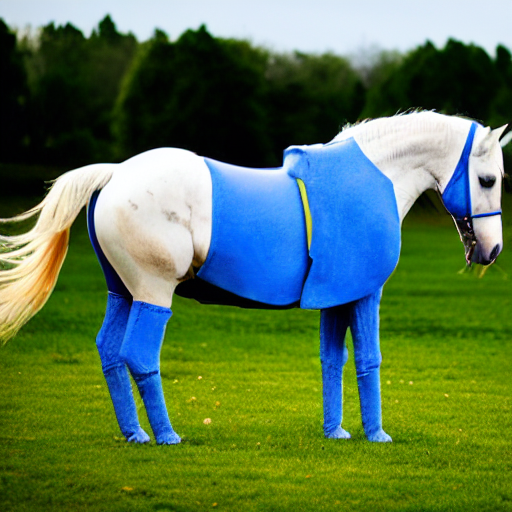

In [ ]:
x2.images[0]

Scheduler for Pipe is now DDIMScheduler


100%|██████████| 51/51 [00:01<00:00, 28.89it/s]


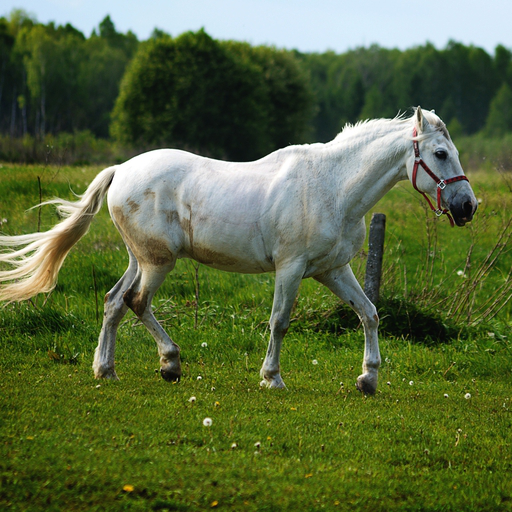

In [ ]:
lat = ddim_inversion_latent(pipe, x, condition_prompt="", num_inference_steps= 50)
x

100%|██████████| 50/50 [00:02<00:00, 16.96it/s]


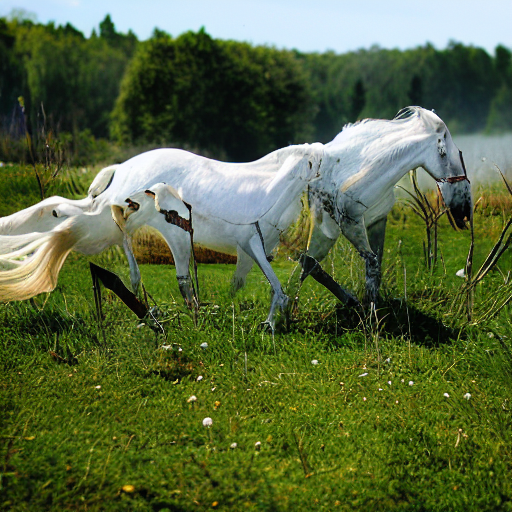

In [ ]:
pipe.safety_checker = None
x_reco = pipe(prompt = "", latents = lat)
x_reco.images[0]

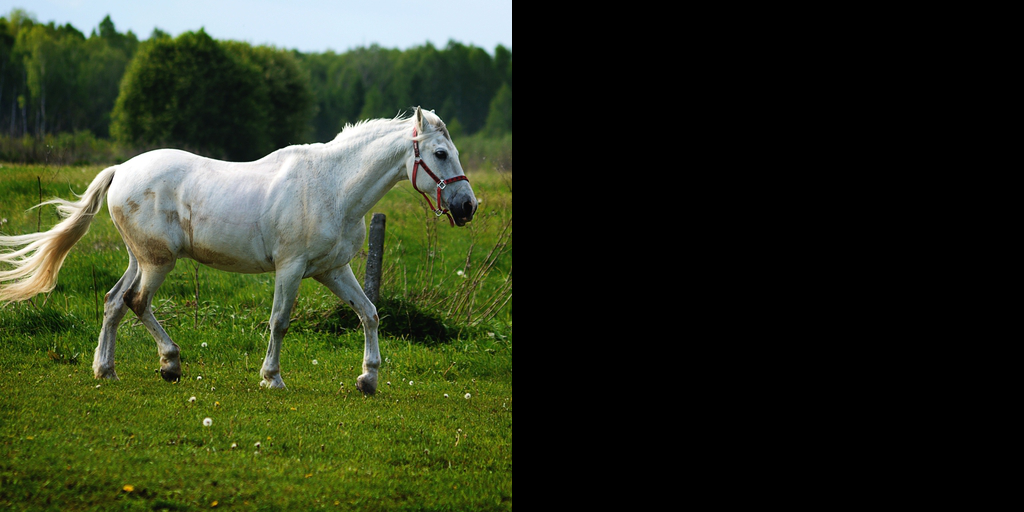

In [ ]:
from PIL import Image
from lora_diffusion import image_grid